In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")


In [3]:
!pip install fsspec


[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [70]:
df=pd.read_csv("C://Users//Ntci//Downloads/Salary_Dataset.csv")
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [5]:
# Dataset structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [6]:
# Summary statistics

df.describe()

,Rating,Salary,Salaries Reported
count,22770.000000,2.277000e+04,22770.000000
mean,3.918213,6.953872e+05,1.855775
std,0.519675,8.843990e+05,6.823668
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [7]:
df.describe(include = 'all')

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
count,22770.000000,22769,22770,2.277000e+04,22770.000000,22770,22770,22770
unique,NaN,11260,1080,NaN,NaN,10,4,11
top,NaN,Tata Consultancy Services,Software Development Engineer,NaN,NaN,Bangalore,Full Time,SDE
freq,NaN,271,2351,NaN,NaN,8264,20083,8183
mean,3.918213,NaN,NaN,6.953872e+05,1.855775,NaN,NaN,NaN
std,0.519675,NaN,NaN,8.843990e+05,6.823668,NaN,NaN,NaN
min,1.000000,NaN,NaN,2.112000e+03,1.000000,NaN,NaN,NaN
25%,3.700000,NaN,NaN,3.000000e+05,1.000000,NaN,NaN,NaN
50%,3.900000,NaN,NaN,5.000000e+05,1.000000,NaN,NaN,NaN
75%,4.200000,NaN,NaN,9.000000e+05,1.000000,NaN,NaN,NaN


In [8]:
# Check missing values

df.isnull().sum()

Rating               0
Company Name         1
Job Title            0
Salary               0
Salaries Reported    0
Location             0
Employment Status    0
Job Roles            0
dtype: int64

In [9]:
# Remove duplicates

df = df.drop_duplicates()

In [10]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


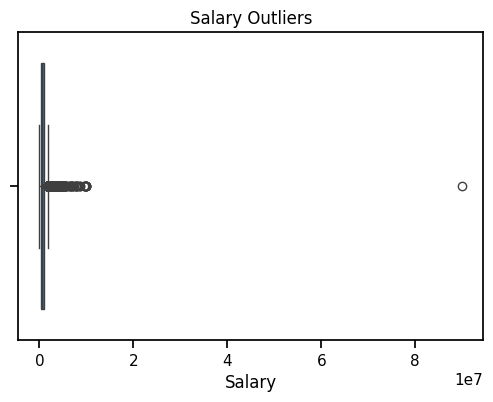

In [11]:
# Visualizing Outlier - First Time

plt.figure(figsize=(6,4))      # Create figure
sns.boxplot(x = df['Salary'])  # Box plot

plt.title("Salary Outliers")   # Set title
plt.show()                     # Show plot

In [17]:
# Calculate quartile

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

In [18]:
# Calculate IQR

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

In [19]:
# Lower outlier limit

df = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

In [20]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


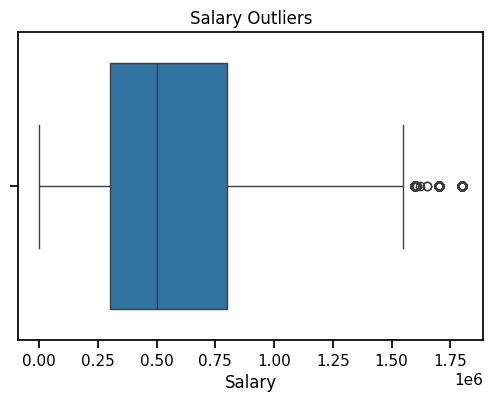

In [21]:
# Visualizing Outlier Again - Second Time

plt.figure(figsize=(6,4))      # Create figure
sns.boxplot(x = df['Salary'])  # Box plot

plt.title("Salary Outliers")   # Set title
plt.show()                     # Show plot

In [22]:
# Calculate quartile

Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

In [23]:
# Calculate IQR

lower_limit = Q1 - 1.5 * IQR

upper_limit = Q3 + 1.5 * IQR

In [24]:
# Lower outlier limit

df = df[(df['Salary'] >= lower_limit) & (df['Salary'] <= upper_limit)]

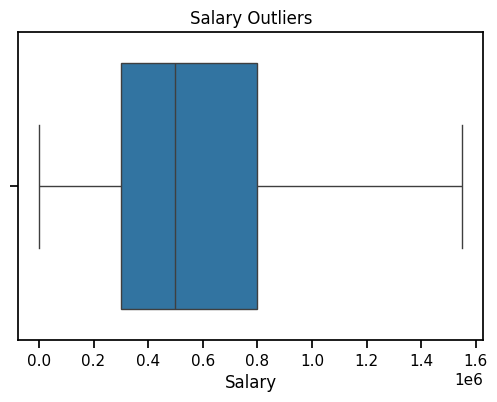

In [25]:
# Visualizing Outlier - Third Time - No Outlier Detected

plt.figure(figsize=(6,4))         # Create figure
sns.boxplot(x = df['Salary'])     # Box plot

plt.title("Salary Outliers")      # Set title
plt.show()                        # Show plot

In [26]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


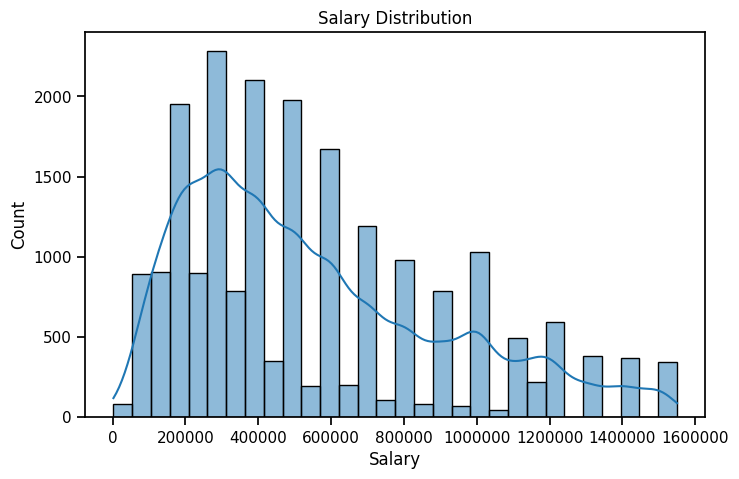

In [27]:
plt.figure(figsize = (8,5))
sns.histplot( df['Salary'], bins = 30, kde = True)       # Histogram plot

plt.ticklabel_format(style='plain', axis='x')

plt.title("Salary Distribution")                         # Set title
plt.xlabel("Salary")                                     # Set x label
plt.ylabel("Count")                                      # Set y label
plt.show()

In [28]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [29]:
# Show count of unique values

df['Job Roles'].nunique()

11

In [30]:
# Show all unique values

df['Job Roles'].unique()

array(['Android', 'Backend', 'Database', 'Frontend', 'IOS', 'Java',
       'Mobile', 'SDE', 'Python', 'Web', 'Testing'], dtype=object)

In [31]:
# Group data

job_salary = df.groupby("Job Roles")['Salary'].mean().sort_values(ascending = False).head(10)

In [32]:
job_salary

Job Roles
Database    702554.768392
SDE         648182.534714
IOS         593214.068241
Mobile      589857.819905
Backend     529104.564347
Frontend    501977.282203
Android     483352.318634
Java        475832.116985
Testing     464824.757895
Python      449531.694295
Name: Salary, dtype: float64

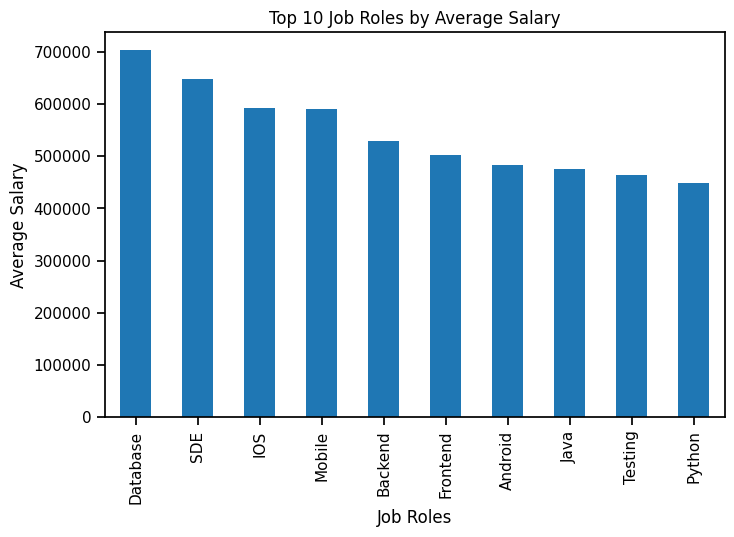

In [33]:
plt.figure(figsize = (8,5))
job_salary.plot(kind = 'bar')                     # bar chart
plt.title("Top 10 Job Roles by Average Salary")
plt.ylabel("Average Salary")
plt.show()

In [34]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [35]:
# Group Data

city_salary = df.groupby('Location')['Salary'].mean().sort_values(ascending = False)

In [36]:
city_salary

Location
Mumbai            702195.874214
Bangalore         568223.271851
Jaipur            566153.846154
Pune              562387.138833
New Delhi         542717.057751
Hyderabad         538809.567450
Kolkata           532604.938272
Kerala            514965.735849
Chennai           505102.446337
Madhya Pradesh    497530.378378
Name: Salary, dtype: float64

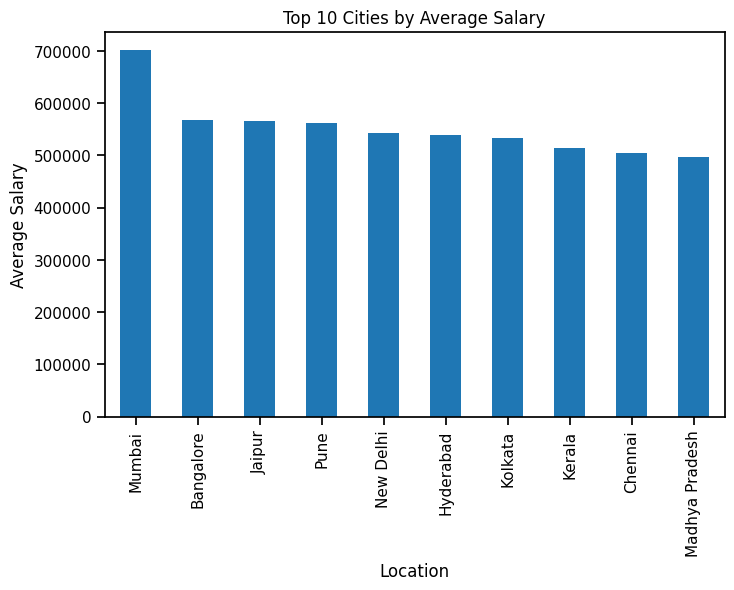

In [37]:
plt.figure(figsize = (8,5))

city_salary.plot(kind = 'bar')                 # bar chart

plt.title("Top 10 Cities by Average Salary")

plt.ylabel("Average Salary")
plt.show()

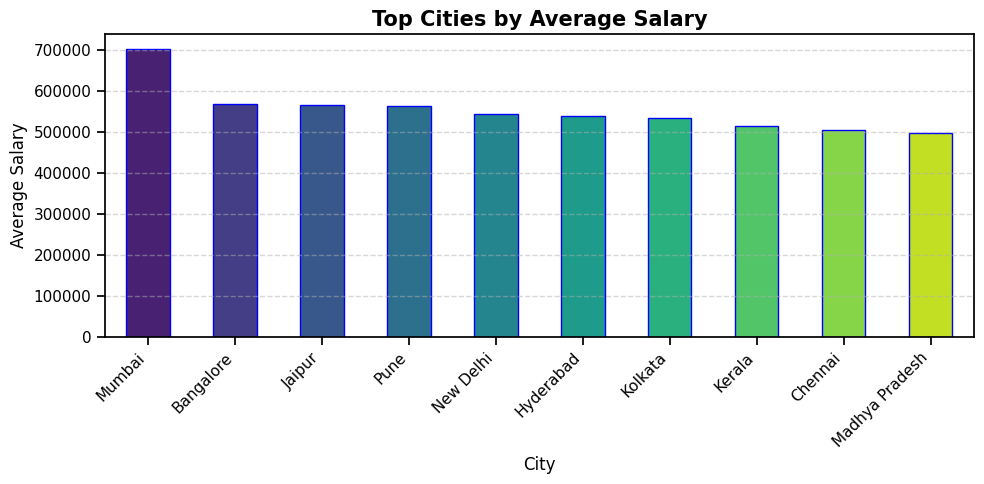

In [38]:
plt.figure(figsize=(10,5))

colors = sns.color_palette("viridis", len(city_salary))        # setting color palette

city_salary.plot(kind="bar", color=colors, edgecolor="blue")   # bar chart

plt.title("Top Cities by Average Salary", fontsize=15, fontweight="bold")
plt.xlabel("City")
plt.ylabel("Average Salary")

plt.xticks(rotation=45, ha="right")                   
plt.grid(axis="y", linestyle="--", alpha=0.5)                  # Add grid

plt.tight_layout()                                             # Adjust spacing
plt.show()

In [39]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [40]:
# Filtering Data

df1 = df[(df['Location'] == 'New Delhi') & (df['Rating'] == 5)].sort_values(by = "Salary", ascending = False)

In [41]:
df1

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
1888,5.0,Trillbit,Android Developer,1500000,1,New Delhi,Full Time,Android
6750,5.0,Hapramp,Front End Developer,1500000,1,New Delhi,Full Time,Frontend
17488,5.0,The Art of Mike Mignola,Software Development Engineer,1500000,1,New Delhi,Full Time,SDE
8284,5.0,Silicon Valley Recycling,Senior IOS Developer,1400000,1,New Delhi,Full Time,IOS
17351,5.0,Parth Universal,Software Development Engineer,1300000,1,New Delhi,Full Time,SDE
...,...,...,...,...,...,...,...,...
8008,5.0,Rabbler,IOS Developer Contractor,100000,1,New Delhi,Contractor,IOS
1969,5.0,WorkingNation,Android Developer - Intern,84000,1,New Delhi,Intern,Android
2334,5.0,Hopin (India),Android Developer - Intern,60000,1,New Delhi,Intern,Android
17524,5.0,Star Catalysts,Software Development Engineer - Intern,60000,1,New Delhi,Intern,SDE


In [42]:
# show elements in the form of list

list(df1['Company Name'].head())

['Trillbit',
 'Hapramp',
 'The Art of Mike Mignola',
 'Silicon Valley Recycling',
 'Parth Universal']

In [43]:
# show elements in the form of list

list(df1['Company Name'].tail())

['Rabbler', 'WorkingNation', 'Hopin (India)', 'Star Catalysts', 'Atom 8']

In [44]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [45]:
# Count frequency

df['Job Title'].value_counts()

Job Title
Software Development Engineer               2137
Android Developer                           1983
Software Development Engineer (SDE)         1477
Front End Developer                         1360
Test Engineer                               1290
                                            ... 
Software Testing                               1
Automation Tester                              1
Web Developer/Android Developer - Intern       1
QA Analyst, Automation Test Engineer           1
Senior Test Lead                               1
Name: count, Length: 981, dtype: int64

In [46]:
# Group Data

df.groupby('Job Title')['Salaries Reported'].count().sort_values(ascending = False)

Job Title
Software Development Engineer                        2137
Android Developer                                    1983
Software Development Engineer (SDE)                  1477
Front End Developer                                  1360
Test Engineer                                        1290
                                                     ... 
UI/User Experience Designer & Front End Developer       1
UI/UX Designer & Front End Developer                    1
UI Front End Developer                                  1
Trainee Test Engineer - Contractor                      1
Trainee Engineer – Software Development                 1
Name: Salaries Reported, Length: 981, dtype: int64

In [47]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [48]:
# Filtering Data

filtered_df = df[df['Salaries Reported'] >= 20]

In [49]:
filtered_df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
8790,3.9,Tata Consultancy Services,Java Developer,200000,30,Chennai,Full Time,Java
8977,3.8,Cognizant Technology Solutions,Senior Java Developer,200000,35,Chennai,Full Time,Java
8978,3.9,Tata Consultancy Services,Senior Java Developer,300000,30,Chennai,Full Time,Java
8979,3.9,Tata Consultancy Services,Junior Java Developer,200000,30,Chennai,Full Time,Java
9688,3.9,Tata Consultancy Services,Java Developer,200000,43,Hyderabad,Full Time,Java
...,...,...,...,...,...,...,...,...
21762,3.8,CGI,Senior Test Engineer,400000,21,Bangalore,Full Time,Testing
21763,4.1,IBM,Test Automation Engineer,400000,21,Bangalore,Full Time,Testing
21764,3.7,SLK Group,Software Test Engineer,300000,20,Bangalore,Full Time,SDE
21765,4.3,Cisco Systems,Software Test Engineer,700000,20,Bangalore,Full Time,SDE


In [50]:
# Group Data

filtered_df.groupby('Company Name')['Salary'].mean().sort_values(ascending = False).head(10)

Company Name
Expedia Group     1.350000e+06
Nokia             1.200000e+06
Amadeus           1.200000e+06
Alcatel-Lucent    1.000000e+06
Ola               1.000000e+06
Kony              9.000000e+05
Lumen             9.000000e+05
Microsoft         7.845714e+05
Cisco Systems     7.000000e+05
McAfee            6.500000e+05
Name: Salary, dtype: float64

In [51]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [52]:
# Correlation matrix

df.corr(numeric_only=True)

,Rating,Salary,Salaries Reported
Rating,1.000000,0.024772,-0.013516
Salary,0.024772,1.000000,-0.021672
Salaries Reported,-0.013516,-0.021672,1.000000


In [53]:
# Correlation between columns

df['Rating'].corr(df['Salary'])

np.float64(0.02477162838343561)

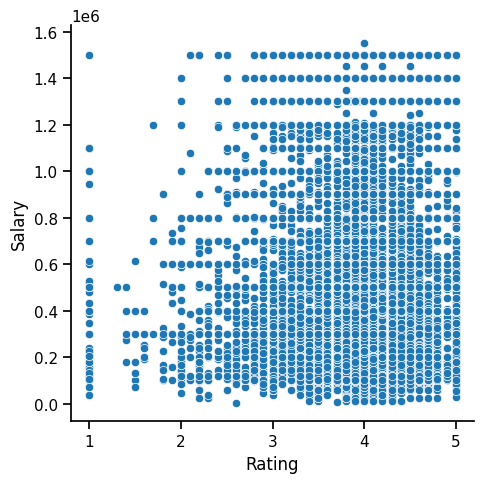

In [54]:
# Scatter Plot

sns.relplot(x = 'Rating', y = 'Salary', data = df)

plt.show()

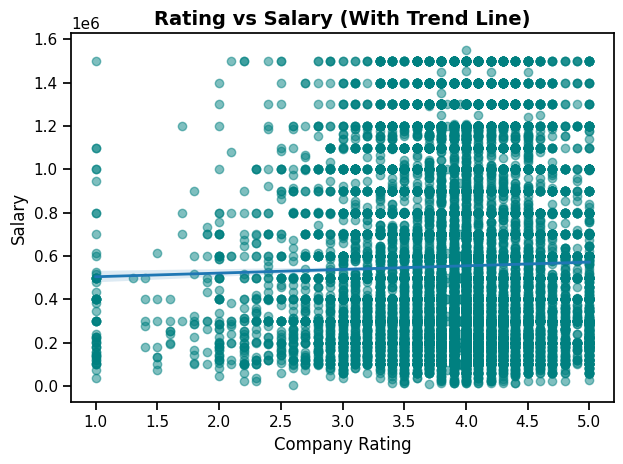

In [55]:
# Scatter with trendline

sns.regplot(x="Rating", y="Salary", data=df, scatter_kws={"alpha": 0.5, "color": "teal"}, line_kws={"linewidth": 2})

plt.title("Rating vs Salary (With Trend Line)", fontsize=14, fontweight="bold")
plt.xlabel("Company Rating")
plt.ylabel("Salary")
plt.tight_layout()              # Adjust spacing
plt.show()

In [56]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [57]:
# Show all unique values

df['Employment Status'].unique()

array(['Full Time', 'Intern', 'Contractor', 'Trainee'], dtype=object)

In [58]:
# Count Frequency

df['Employment Status'].value_counts()

Employment Status
Full Time     18379
Intern         2089
Contractor      513
Trainee          33
Name: count, dtype: int64

In [59]:
# Group Data

df.groupby("Employment Status")['Salary'].describe()

,count,mean,std,min,25%,50%,75%,max
Employment Status,,,,,,,,
Contractor,513.0,501507.586745,315663.813209,12000.0,300000.0,400000.0,600000.0,1500000.0
Full Time,18379.0,579305.536101,358065.460032,8448.0,300000.0,500000.0,800000.0,1550000.0
Intern,2089.0,338353.991383,264180.887035,2112.0,144000.0,264000.0,456000.0,1500000.0
Trainee,33.0,324303.030303,241096.516572,96000.0,144000.0,240000.0,400000.0,1100000.0


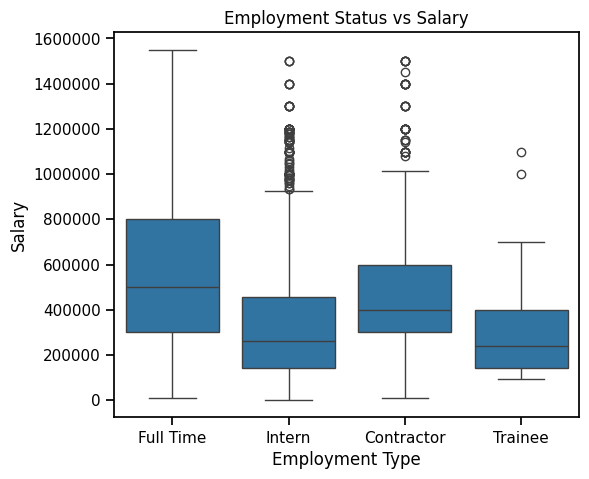

In [60]:
plt.figure(figsize=(6,5))

sns.boxplot(x = "Employment Status", y = "Salary", data = df)           # box plot

plt.ticklabel_format(style = 'plain', axis = 'y')

plt.title("Employment Status vs Salary", fontsize = 12)
plt.xlabel("Employment Type")
plt.ylabel("Salary")

plt.show()

In [61]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [62]:
# Show frequency

df['Job Roles'].value_counts()

Job Roles
SDE         7245
Android     2812
Frontend    2034
Java        1778
Testing     1710
IOS         1524
Backend     1049
Web          988
Python       929
Database     734
Mobile       211
Name: count, dtype: int64

In [63]:
top_roles = df['Job Roles'].value_counts().head(10)

In [64]:
top_roles

Job Roles
SDE         7245
Android     2812
Frontend    2034
Java        1778
Testing     1710
IOS         1524
Backend     1049
Web          988
Python       929
Database     734
Name: count, dtype: int64

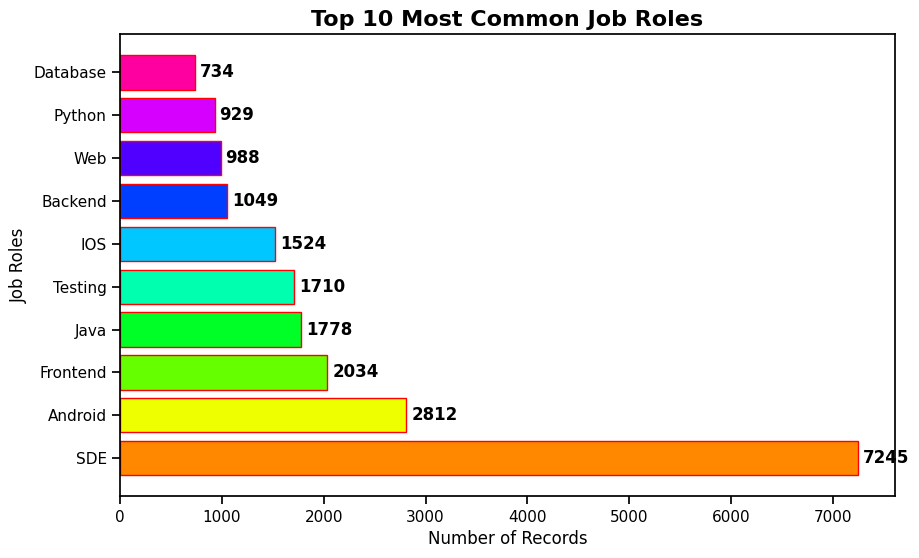

In [65]:
plt.figure(figsize = (10,6))

# use gradient colors
colors = sns.color_palette("hsv", len(top_roles))
                  
# Horizontal Bar Chart
plt.barh(top_roles.index, top_roles.values, color = colors, edgecolor = 'red')

# Add value labels on bars
for i, v in enumerate(top_roles.values):
    plt.text(v + 50, i, str(v), va = 'center', fontweight = 'bold')
    
# Titles and labels
plt.title("Top 10 Most Common Job Roles", fontsize=16, fontweight="bold")
plt.xlabel("Number of Records", fontsize=12)
plt.ylabel("Job Roles", fontsize=12)

plt.show()

In [66]:
df

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [67]:
# Group Data

rating_salary = df.groupby('Rating')['Salary'].mean().reset_index()

rating_salary.head()

,Rating,Salary
0,1.0,399971.500000
1,1.3,500000.000000
2,1.4,331200.000000
3,1.5,241000.000000
4,1.6,262285.714286


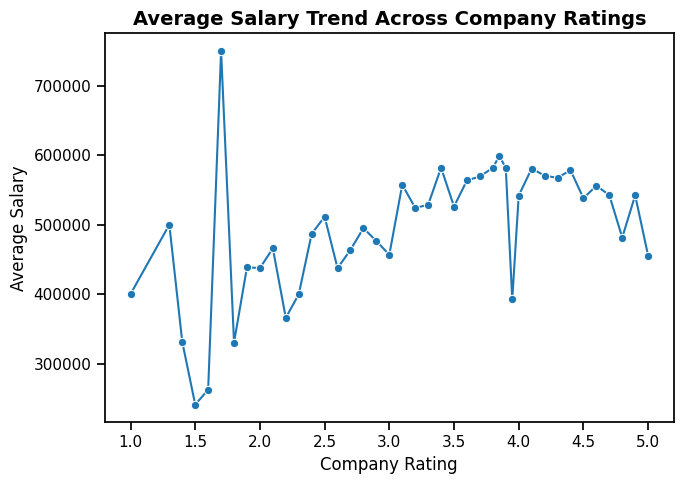

In [68]:
plt.figure(figsize = (7,5))

sns.lineplot(x = 'Rating', y = 'Salary', data = rating_salary, marker = 'o' )           # Line Plot

plt.title("Average Salary Trend Across Company Ratings", fontsize=14, fontweight="bold")
plt.xlabel("Company Rating")
plt.ylabel("Average Salary")
plt.tight_layout()                      # Adjust spacing
plt.show()

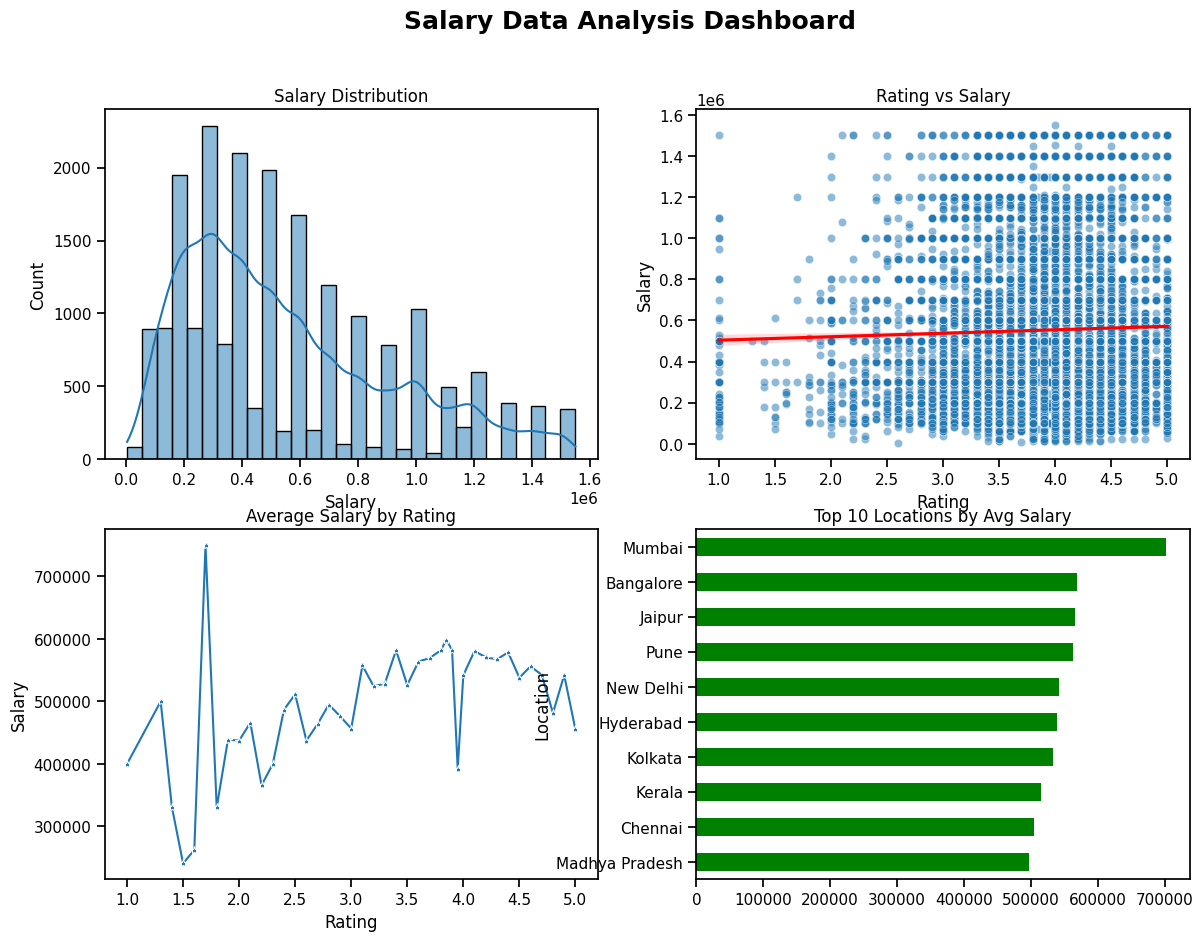

In [69]:
# Prepare data
rating_salary = df.groupby('Rating')['Salary'].mean().reset_index()
top_locations = df.groupby('Location')['Salary'].mean().sort_values(ascending = False)

# Create Dashboard Layout
plt.figure(figsize=(14,10))

#1. Salary Distribution
plt.subplot(2,2,1)
sns.histplot(df['Salary'], bins = 30, kde=True)
plt.title("Salary Distribution")

#2. Rating vs Salary
plt.subplot(2,2,2)
sns.scatterplot(x="Rating", y='Salary', data=df, alpha=0.5)
sns.regplot(x = 'Rating', y = 'Salary', data = df, scatter = False, color = 'red')
plt.title("Rating vs Salary")

#3. Average Salary by Rating
plt.subplot(2,2,3)
sns.lineplot(x='Rating', y='Salary', data = rating_salary, marker = '*')
plt.title("Average Salary by Rating")

#4. Top Locations
plt.subplot(2,2,4)
top_locations.sort_values().plot(kind='barh', color='green')
plt.title("Top 10 Locations by Avg Salary")

plt.suptitle("Salary Data Analysis Dashboard", fontsize=18, fontweight = 'bold')
plt.show()